In [2]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nptdms import TdmsFile #Process ramping file

In [3]:
#Loading data function
def load_channel_and_time(dir_path, channel):
    """Loading a channel from a directory and return a pandas data frame with two columns, channle and time"""
    
    data_frame = pd.DataFrame(data = {channel: np.load(dir_path + channel + ".npy"),
                                     "time": np.load(dir_path + "time.npy")})
    
    return data_frame


#Plot a single channel, used by next function
def plot_channel(data, channel, time_range = None):
    
    #Take data within the time range
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
        
    data = data[(data["time"] > start) & (data["time"] < end)]
    
    #plot
    plt.figure(figsize=(20,2))
    plt.plot(data["time"], data[channel])
    plt.xlabel("Time (s)")
    plt.ylabel("Volt")
    plt.title("Variable {}".format(channel))
    plt.show()
    
    %reset -f in

#Plotting data function
def load_and_plot(dir_path, channel, time_range = None):
    """Load a particular channel from a quench, and then plot it.  
    """
    ai = load_channel_and_time(dir_path, channel)
    
    plot_channel(ai, channel, time_range = time_range)
    
    #Just for dumping data from RAM on the server, needed when processing larger amount of data
    #don't need to worry about this for now. 
    %reset -f in
    
#RMS value analysis
def rms(data):
    return np.nanmean(np.sqrt(data**2))

def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

def plot_rms(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    rms_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(rms, raw = True).to_numpy()[window-1::step]
    
    #Variance
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, 
             rms_sensor,
             label = "Moving RMS",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s Moving RMS".format(channel))
    plt.show()
    
def plot_rms_product(dir_path, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(rms, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(rms, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(rms, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(rms, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(rms, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of R.M.S.")

----------------

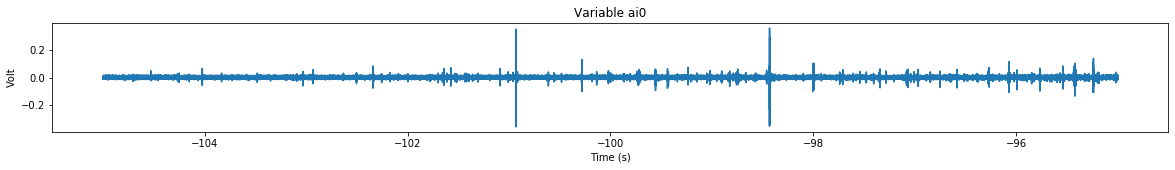

Flushing input history
Flushing input history


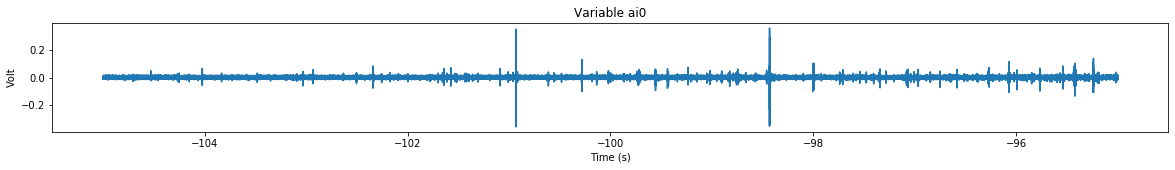

Flushing input history
Flushing input history


In [6]:
load_and_plot("./data/Ramp19/", "ai0", time_range = (-105,-95))

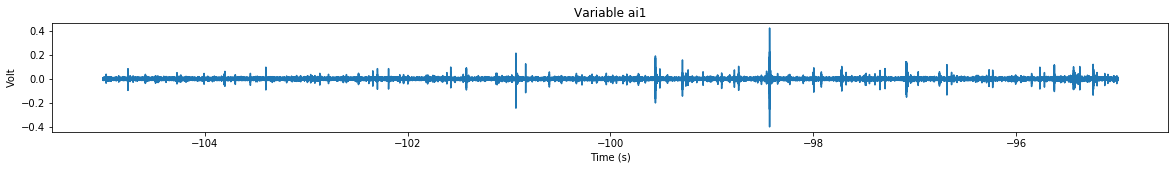

Flushing input history
Flushing input history


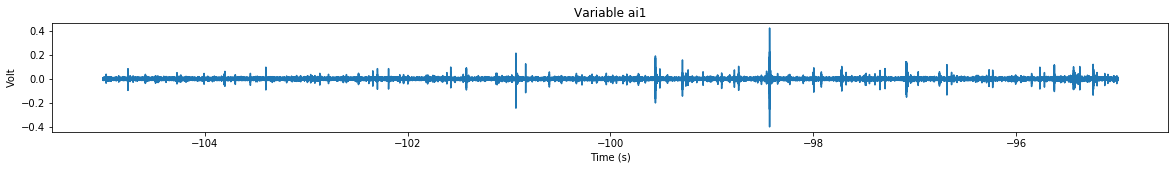

Flushing input history
Flushing input history


In [7]:
load_and_plot("./data/Ramp19/", "ai1", time_range = (-105,-95))

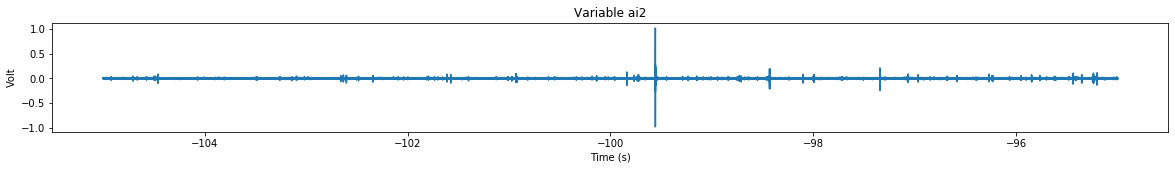

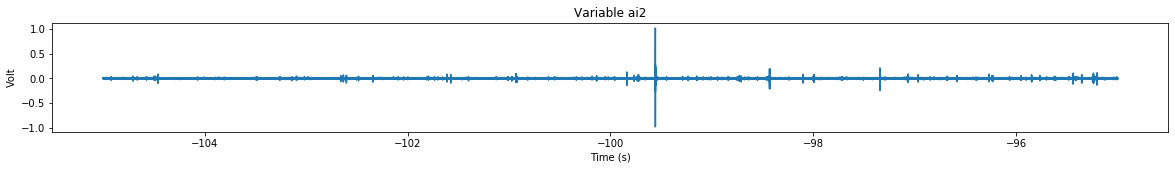

Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [8]:
load_and_plot("./data/Ramp19/", "ai2", time_range = (-105,-95))

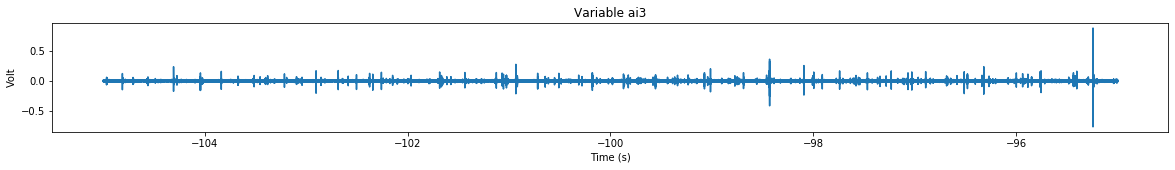

Flushing input history
Flushing input history


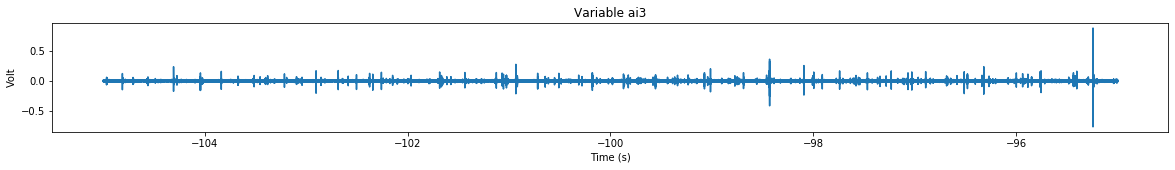

Flushing input history
Flushing input history


In [9]:
load_and_plot("./data/Ramp19/", "ai3", time_range = (-105,-95))

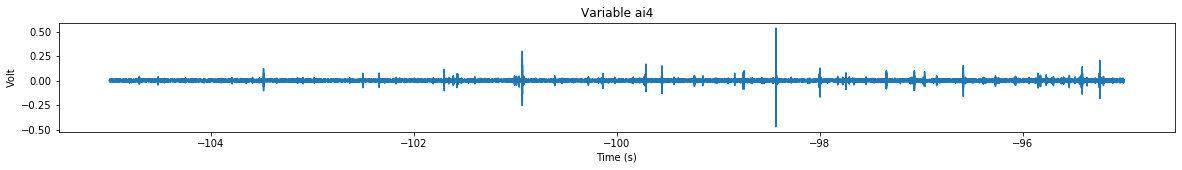

Flushing input history
Flushing input history


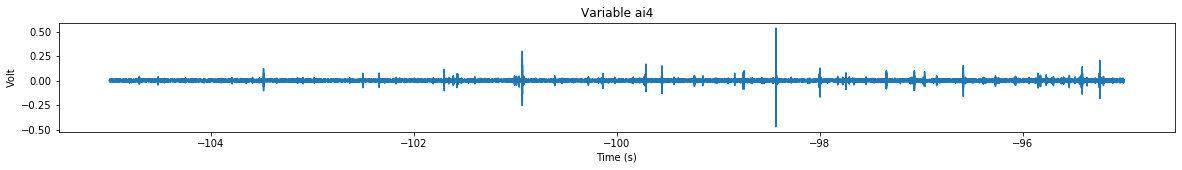

Flushing input history
Flushing input history


In [10]:
load_and_plot("./data/Ramp19/", "ai4", time_range = (-105,-95))

------

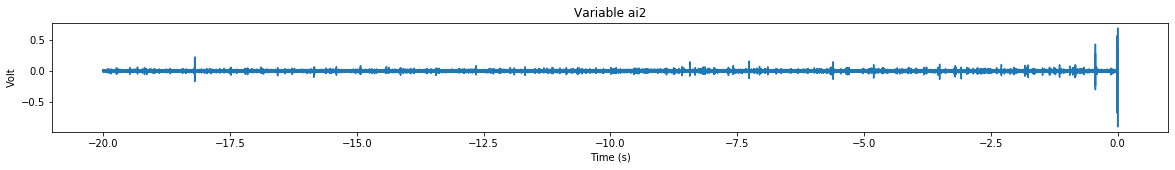

Flushing input history
Flushing input history


In [5]:
load_and_plot("./data/Ramp22/", "ai2", time_range = (-20,0))

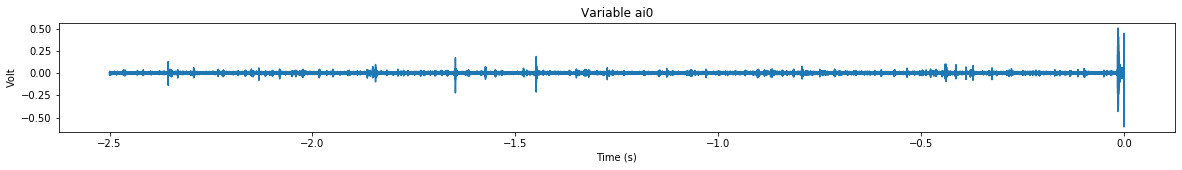

Flushing input history
Flushing input history


In [4]:
load_and_plot("./data/Ramp22/", "ai0", time_range = (-2.5,0))

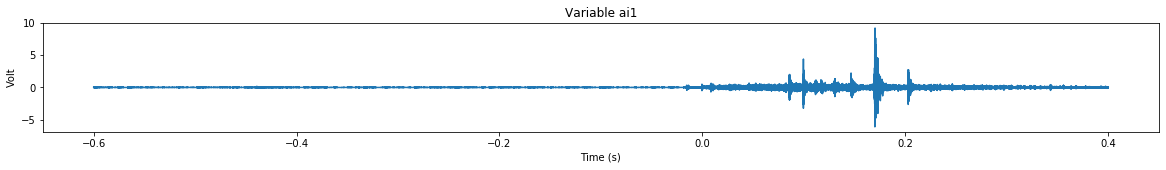

Flushing input history
Flushing input history


In [14]:
load_and_plot("./data/Ramp22/", "ai1", time_range = (-0.6,0.4))

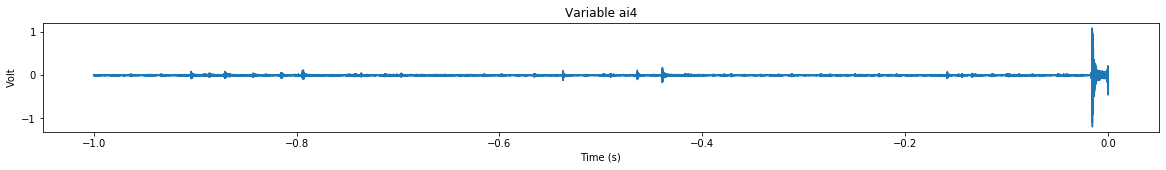

Flushing input history
Flushing input history


In [15]:
load_and_plot("./data/Ramp22/", "ai4", time_range = (-1,0))

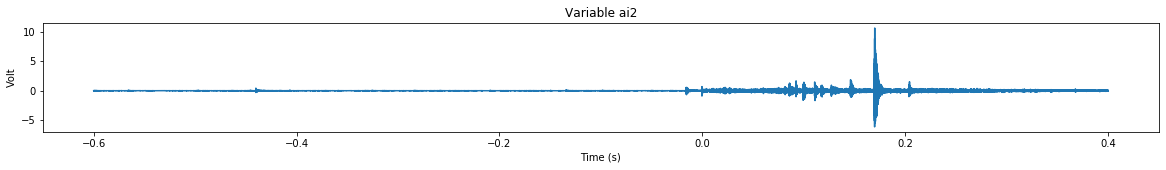

Flushing input history
Flushing input history


In [11]:
load_and_plot("./data/Ramp22/", "ai2", time_range = (-0.6,0.4))

Flushing input history
Flushing input history


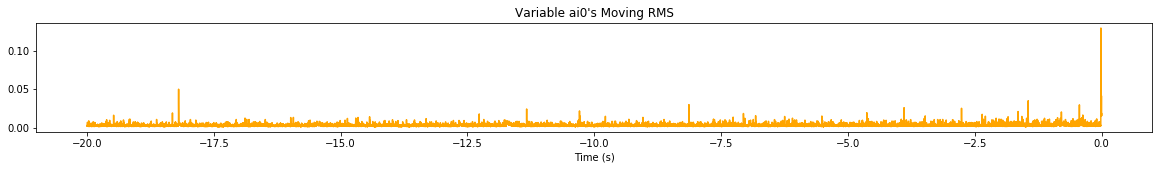

In [5]:
plot_rms("./data/Ramp22/", "ai0", time_range = (-20,0), window = 200)

Flushing input history
Flushing input history


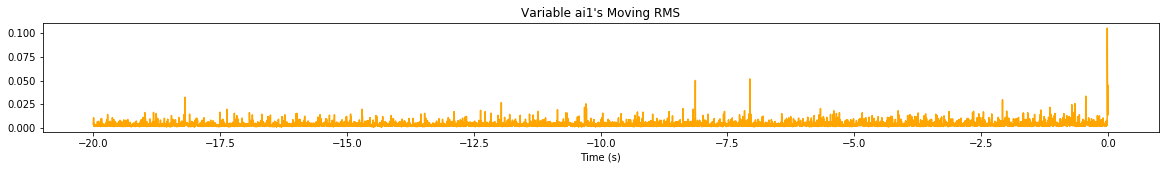

In [6]:
plot_rms("./data/Ramp22/", "ai1", time_range = (-20,0), window = 200)

Flushing input history
Flushing input history


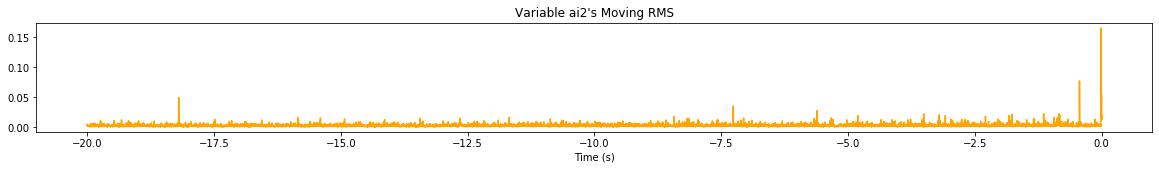

In [7]:
plot_rms("./data/Ramp22/", "ai2", time_range = (-20,0), window = 200)

Flushing input history
Flushing input history


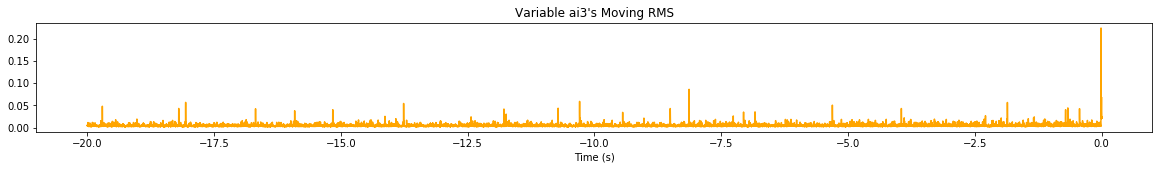

In [8]:
plot_rms("./data/Ramp22/", "ai3", time_range = (-20,0), window = 200)

Flushing input history
Flushing input history


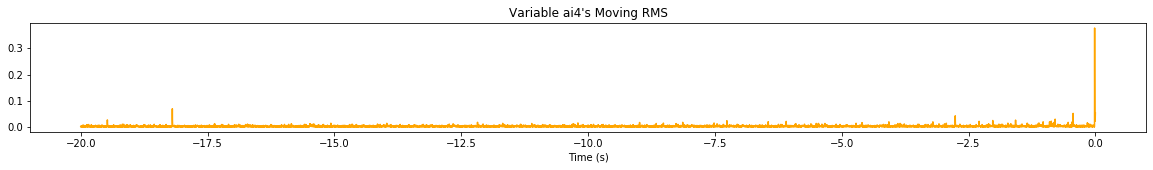

In [9]:
plot_rms("./data/Ramp22/", "ai4", time_range = (-20,0), window = 200)